In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Cost,Item Purchased,Name
Store 1,22.5,Sponge,Chris
Store 1,2.5,Kitty Litter,Kevyn
Store 2,5.0,Spoon,Filip


In [7]:
df.T

,Store 1,Store 1,Store 2
Cost,22.5,2.5,5
Item Purchased,Sponge,Kitty Litter,Spoon
Name,Chris,Kevyn,Filip


In [3]:
df['Date'] = ['Jan 1', 'Feb 4','April 10']

In [5]:
df['Delivered'] = True

In [6]:
df

,Cost,Item Purchased,Name,Date,Delivered
Store 1,22.5,Sponge,Chris,Jan 1,True
Store 1,2.5,Kitty Litter,Kevyn,Feb 4,True
Store 2,5.0,Spoon,Filip,April 10,True


In [12]:
#adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf['Whatever'] = pd.Series({1:'stuff',2:'dude',3:'umm'}) #extra stuff is just truncated
adf

,index,Cost,Item Purchased,Name,Date,Delivered,Whatever
0,Store 1,22.5,Sponge,Chris,December 1,True,NaN
1,Store 1,2.5,Kitty Litter,Kevyn,NaN,True,stuff
2,Store 2,5.0,Spoon,Filip,mid-May,True,dude


In [15]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
student_df.head()

,School
Name,
James,Business
Mike,Law
Sally,Engineering


In [14]:
staff_df

,Role
Name,
Kelly,Director of HR
Sally,Course liasion
James,Grader


In [17]:
joindf = staff_df.join(student_df) #defaults to using the index as the "on" clause, joins on index by default

In [18]:
joindf

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [20]:
pd.merge(staff_df,student_df, how='outer',left_index = True, right_index = True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [21]:
pd.merge(staff_df,student_df, how='inner',left_index = True, right_index = True)
#left_index is asking 'are you using the left index for your new index in the joined dataframe?'

,Role,School
Name,,
James,Grader,Business
Sally,Course liasion,Engineering


In [22]:
pd.merge(staff_df,student_df, how='left',left_index = True, right_index = True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [32]:
#staff_df = staff_df.reset_index()
student_df = student_df.reset_index()

In [25]:
staff_df

,Name,Role
0,Kelly,Director of HR
1,Sally,Course liasion
2,James,Grader


In [33]:
pd.merge(staff_df,student_df,how='inner',left_on='Name',right_on='Name')

,Name,Role,School
0,Sally,Course liasion,Engineering
1,James,Grader,Business


In [34]:
pd.merge(staff_df,student_df) #works nicely when your data is properly cleaned

,Name,Role,School
0,Sally,Course liasion,Engineering
1,James,Grader,Business


In [35]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
#pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [36]:
staff_df

,Location,Name,Role
0,State Street,Kelly,Director of HR
1,Washington Avenue,Sally,Course liasion
2,Washington Avenue,James,Grader


In [37]:
student_df

,Location,Name,School
0,1024 Billiard Avenue,James,Business
1,Fraternity House #22,Mike,Law
2,512 Wilson Crescent,Sally,Engineering


In [38]:
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [39]:
pd.merge(staff_df, student_df, how='left', on='Name')
#the location column is common to each dataframe being merged BUT doesn't represent the same thing

,Location_x,Name,Role,Location_y,School
0,State Street,Kelly,Director of HR,NaN,NaN
1,Washington Avenue,Sally,Course liasion,512 Wilson Crescent,Engineering
2,Washington Avenue,James,Grader,1024 Billiard Avenue,Business


In [2]:
df = pd.read_csv('census.csv')
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-30.953709,-5.180127,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-14.032727,-11.684234,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-6.155670,-4.611706,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,-2.731639,3.849092,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901


In [43]:
(df[df['SUMLEV']==50]
    .dropna()
    .set_index(['STNAME','CTYNAME'])
    .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})
    .head(5))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                   
Alabama Autauga County      50       3         6      1       1   
        Baldwin County      50       3         6      1       3   
        Barbour County      50       3         6      1       5   
        Bibb County         50       3         6      1       7   
        Blount County       50       3         6      1       9   

                        CENSUS2010POP  Estimates Base 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                               
Alabama Autauga County          54571                54571            54660   
        Baldwin County         182265               182265           183193   
        Barbour County          27457                27457            27341   
        Bibb County             22915                22919            22861   
        Blount County           57322                57322            57373   

                        POPESTIMATE2011  POPESTIMATE2012     ...       \
STNAME  CTYNAME                                              ...        
Alabama Autauga County            55253            55175     ...        
        Baldwin County           186659           190396     ...        
        Barbour County            27226            27159     ...        
        Bibb County               22733            22642     ...        
        Blount County             57711            57776     ...        

                        RDOMESTICMIG2011  RDOMESTICMIG2012  RDOMESTICMIG2013  \
STNAME  CTYNAME                                                                
Alabama Autauga County          7.242091         -2.915927         -3.012349   
        Baldwin County         14.832960         17.647293         21.845705   
        Barbour County         -4.728132         -2.500690         -7.056824   
        Bibb County            -5.527043         -5.068871         -6.201001   
        Blount County           1.807375         -1.177622         -1.748766   

                        RDOMESTICMIG2014  RDOMESTICMIG2015  RNETMIG2011  \
STNAME  CTYNAME                                                           
Alabama Autauga County          2.265971         -2.530799     7.606016   
        Baldwin County         19.243287         17.197872    15.844176   
        Barbour County         -3.904217        -10.543299    -4.874741   
        Bibb County            -0.177537          0.177258    -5.088389   
        Blount County          -2.062535         -1.369970     1.859511   

                        RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  
STNAME  CTYNAME                                                             
Alabama Autauga County    -2.626146    -2.722002     2.592270    -2.187333  
        Baldwin County    18.559627    22.727626    20.317142    18.293499  
        Barbour County    -2.758113    -7.167664    -3.978583   -10.543299  
        Bibb County       -4.363636    -5.403729     0.754533     1.107861  
        Blount County     -0.848580    -1.402476    -1.577232    -0.884411  

[5 rows x 98 columns]

In [47]:
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = data.max()
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max,min
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4858979,4785161
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,54660
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,183193
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,26489
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22512
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411,57776,57373
6,50,3,6,1,11,Alabama,Bullock County,10914,10915,10887,...,-1.130263,14.354290,-16.167247,-29.001673,-2.825524,1.507017,17.243790,-13.193961,10887,10606
7,50,3,6,1,13,Alabama,Butler County,20947,20946,20944,...,-5.655413,1.085428,-6.529805,-13.936612,-11.586865,-5.557058,1.184103,-6.430868,20944,20154
8,50,3,6,1,15,Alabama,Calhoun County,118572,118586,118437,...,-5.524649,-4.463211,-3.376322,-5.791579,-4.092677,-5.062836,-3.912834,-2.806406,118437,115620
9,50,3,6,1,17,Alabama,Chambers County,34215,34170,34098,...,2.872721,-2.287222,1.349468,-1.821092,4.701181,3.781439,-1.290228,2.346901,34153,33993


In [55]:
rows = ['POPESTIMATE2010',
         'POPESTIMATE2011',
         'POPESTIMATE2012',
         'POPESTIMATE2013',
         'POPESTIMATE2014',
         'POPESTIMATE2015']
df['max2'] = df.apply(lambda x: x[rows].max(),axis=1)
df['min2'] = df.apply(lambda x: x[rows].min(),axis=1)

In [56]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max2,min2
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4858979,4785161
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,54660
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,183193
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,26489
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22512


In [10]:
#df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].sum()
df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'CENSUS2010POP':np.sum}).head()
#groupby the index

,CENSUS2010POP
STNAME,
Alabama,9559472
Alaska,1420462
Arizona,12784034
Arkansas,5831836
California,74507912


In [11]:
df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'sum':np.sum}).head()


,sum
STNAME,
Alabama,9559472
Alaska,1420462
Arizona,12784034
Arkansas,5831836
California,74507912


In [15]:
df['pop sum'] = df.groupby('STNAME')['CENSUS2010POP'].agg({'sum':np.sum}).head()
#doesn't work

In [20]:
df.set_index('STNAME').groupby(level=0)[['POPESTIMATE2010','POPESTIMATE2011']].agg({'sum':np.sum,'avg':np.mean}).head()
#nice hierarchy

sum                             avg                
           POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010 POPESTIMATE2011
STNAME                                                                    
Alabama            9570322         9602216    1.407400e+05    1.412091e+05
Alaska             1428042         1445440    4.760140e+04    4.818133e+04
Arizona           12816416        12937464    8.010260e+05    8.085915e+05
Arkansas           5844788         5877076    7.690511e+04    7.732995e+04
California        74668158        75400068    1.265562e+06    1.277967e+06

In [23]:
df.groupby('STNAME')[['POPESTIMATE2010','POPESTIMATE2011']].agg({'sum':np.sum,'avg':np.average}).head()

sum                             avg                
           POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010 POPESTIMATE2011
STNAME                                                                    
Alabama            9570322         9602216    1.407400e+05    1.412091e+05
Alaska             1428042         1445440    4.760140e+04    4.818133e+04
Arizona           12816416        12937464    8.010260e+05    8.085915e+05
Arkansas           5844788         5877076    7.690511e+04    7.732995e+04
California        74668158        75400068    1.265562e+06    1.277967e+06

In [24]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [25]:
df['Grades'].astype('category')

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
good         B-
ok           C+
ok            C
ok           C-
poor         D+
poor          D
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [35]:
df['Grades'].tolist()[0]

'A+'

In [39]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average})

In [40]:
df.head()

,avg
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207


In [46]:
pd.cut(df['avg'],10)

STNAME
Alabama                  (11706.0871, 75333.413]
Alaska                   (11706.0871, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                 (11706.0871, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                  (11706.0871, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                    (11706.0871, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                  (11706.0871, 75333.413]
Iowa                     (11706.0871, 75333.413]
Kansas                   (11706.0871, 75333.413]
Kentucky                 (11706.0871, 75333.413]
Louisiana                (11706.0871, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

In [43]:
pd.cut(df[])

In [8]:
df = pd.read_csv('cars.csv')

In [12]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,n/a,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,n/a,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,n/a,117,7


In [15]:
df.pivot_table(values='(kW)', index='YEAR', columns = 'Make', aggfunc=np.mean)
#I want the average kW for each brand
#groupby by the year (optional)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [21]:
df.pivot_table(values='(km)',columns='Make',aggfunc=np.mean)
#returns a series if you don't specify an index, which is like a groupby

Make
BMW           130.000000
CHEVROLET     131.000000
FORD          122.000000
KIA           149.000000
MITSUBISHI    100.000000
NISSAN        135.166667
SMART         109.000000
TESLA         393.652174
Name: (km), dtype: float64

In [22]:
df.pivot_table(values='(kW)',index=['YEAR','Make'])

YEAR  Make      
2012  MITSUBISHI     49.000000
      NISSAN         80.000000
2013  FORD          107.000000
      MITSUBISHI     49.000000
      NISSAN         80.000000
      SMART          35.000000
      TESLA         280.000000
2014  CHEVROLET     104.000000
      FORD          107.000000
      MITSUBISHI     49.000000
      NISSAN         80.000000
      SMART          35.000000
      TESLA         268.333333
2015  BMW           125.000000
      CHEVROLET     104.000000
      FORD          107.000000
      KIA            81.000000
      MITSUBISHI     49.000000
      NISSAN         80.000000
      SMART          35.000000
      TESLA         320.666667
2016  BMW           125.000000
      CHEVROLET     104.000000
      FORD          107.000000
      KIA            81.000000
      MITSUBISHI     49.000000
      NISSAN         80.000000
      SMART          35.000000
      TESLA         409.700000
Name: (kW), dtype: float64

In [25]:
df.pivot_table(values='(km)',index='YEAR',columns='Make',aggfunc=[np.mean,np.sum])
#pass in a list of agg functions
#I want how far the cars can go on average and total(stupid but okay) every year

mean                                                               \
Make    BMW CHEVROLET   FORD    KIA MITSUBISHI NISSAN  SMART       TESLA   
YEAR                                                                       
2012    NaN       NaN    NaN    NaN      100.0  117.0    NaN         NaN   
2013    NaN       NaN  122.0    NaN      100.0  117.0  109.0  352.750000   
2014    NaN     131.0  122.0    NaN      100.0  135.0  109.0  395.666667   
2015  130.0     131.0  122.0  149.0      100.0  135.0  109.0  394.333333   
2016  130.0     131.0  122.0  149.0      100.0  153.5  109.0  409.000000   

        sum                                                           
Make    BMW CHEVROLET   FORD    KIA MITSUBISHI NISSAN  SMART   TESLA  
YEAR                                                                  
2012    NaN       NaN    NaN    NaN      100.0  117.0    NaN     NaN  
2013    NaN       NaN  122.0    NaN      100.0  117.0  218.0  1411.0  
2014    NaN     131.0  122.0    NaN      100.0  135.0  218.0  1187.0  
2015  130.0     131.0  122.0  149.0      100.0  135.0  218.0  2366.0  
2016  130.0     131.0  122.0  149.0      100.0  307.0  218.0  4090.0

In [26]:
df.pivot_table(values='(km)',index=['YEAR','Make'],aggfunc=[np.mean,np.sum])
#not as nice
#when you make 'Make' a column, it'll appear as a column
#if you make it an index, you'll see them as rows. 
#do you want your data to display wider or taller? 

mean   sum
YEAR Make                        
2012 MITSUBISHI  100.000000   100
     NISSAN      117.000000   117
2013 FORD        122.000000   122
     MITSUBISHI  100.000000   100
     NISSAN      117.000000   117
     SMART       109.000000   218
     TESLA       352.750000  1411
2014 CHEVROLET   131.000000   131
     FORD        122.000000   122
     MITSUBISHI  100.000000   100
     NISSAN      135.000000   135
     SMART       109.000000   218
     TESLA       395.666667  1187
2015 BMW         130.000000   130
     CHEVROLET   131.000000   131
     FORD        122.000000   122
     KIA         149.000000   149
     MITSUBISHI  100.000000   100
     NISSAN      135.000000   135
     SMART       109.000000   218
     TESLA       394.333333  2366
2016 BMW         130.000000   130
     CHEVROLET   131.000000   131
     FORD        122.000000   122
     KIA         149.000000   149
     MITSUBISHI  100.000000   100
     NISSAN      153.500000   307
     SMART       109.000000   218
     TESLA       409.000000  4090

In [27]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

In [28]:
pd.Period('1/2016') #m for month

Period('2016-01', 'M')

In [29]:
pd.Period('04/10/1987') #d for day

Period('1987-04-10', 'D')

In [30]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [31]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,11,74
"Aug 29, 2014",91,54
2015-06-26,58,78
7/12/16,90,54


In [33]:
ts3.index = pd.to_datetime(ts3.index)

In [35]:
ts3

,a,b
2013-06-02,11,74
2014-08-29,91,54
2015-06-26,58,78
2016-07-12,90,54


In [38]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')
#Timedelta is its own data type

Timedelta('2 days 00:00:00')

In [39]:
dates = pd.date_range('10-01-2016',periods=9,freq='2W-SUN')
#starts oct 1, 9 periods happening every sunday every two weeks 

In [40]:
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [41]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,102,129
2016-10-16,107,119
2016-10-30,103,117
2016-11-13,102,128
2016-11-27,103,122
2016-12-11,111,128
2016-12-25,107,121
2017-01-08,107,123
2017-01-22,116,126


In [42]:
df.index.weekday_name

array(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'], dtype=object)

In [44]:
df.diff()
#DATA OVER TIME 

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,5.0,-10.0
2016-10-30,-4.0,-2.0
2016-11-13,-1.0,11.0
2016-11-27,1.0,-6.0
2016-12-11,8.0,6.0
2016-12-25,-4.0,-7.0
2017-01-08,0.0,2.0
2017-01-22,9.0,3.0


In [46]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,104.0,121.666667
2016-11-30,102.5,125.000000
2016-12-31,109.0,124.500000
2017-01-31,111.5,124.500000


In [48]:
df['2016-12':]
#easy slicing using a string that I guess python knows is a date? 

,Count 1,Count 2
2016-12-11,111,128
2016-12-25,107,121
2017-01-08,107,123
2017-01-22,116,126


In [49]:
type('2016-12')

str

In [50]:
df['2016-11':'2017-01']
#inclusive

,Count 1,Count 2
2016-11-13,102,128
2016-11-27,103,122
2016-12-11,111,128
2016-12-25,107,121
2017-01-08,107,123
2017-01-22,116,126


In [53]:
df[:'2016-12']
#everything before Jan 1 2017 because the daterange is inclusive, unlike ints

,Count 1,Count 2
2016-10-02,102,129
2016-10-16,107,119
2016-10-30,103,117
2016-11-13,102,128
2016-11-27,103,122
2016-12-11,111,128
2016-12-25,107,121


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

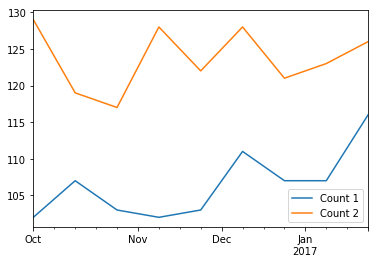

In [55]:
df.plot()